In [1]:
#imporing 
import sqlite3

# Connect to ( create) the database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS  sales_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL,
    sale_date TEXT NOT NULL
)
''')

sample_data = [
    ('Laptop', 2, 999.99, '2025-04-01'),
    ('Smartphone', 5, 499.50, '2025-04-03'),
    ('Headphones', 10, 79.99, '2025-04-05'),
    ('Monitor', 3, 199.99, '2025-04-07')
]

cursor.execute("DELETE FROM sales_data")

cursor.executemany('''
INSERT INTO sales_data (product, quantity, price, sale_date)
VALUES (?, ?, ?, ?)
''', sample_data)

conn.commit()
conn.close()
print("database created successfully")

database created successfully


In [3]:
# printing products of the databse
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute ("SELECT product FROM sales_data")

rows = cursor.fetchall()
if rows:    
    for row in rows:
        print(row[0])    
else:
    print("No data found")

conn.close()

Laptop
Smartphone
Headphones
Monitor


In [5]:
#printing sum of quantity
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute("SELECT SUM(quantity) as total_quantity from sales_data")

rows=cursor.fetchall()
for row in rows:
    print("Total quantity sold",row[0])

conn.close()

Total quantity sold 20


In [11]:
# printing total revenue 
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute("SELECT SUM(quantity * price) as revenue from sales_data GROUP by product")

rows=cursor.fetchall()
for row in rows:
    print("Total revenue",row[0])

conn.close()

Total revenue 799.9
Total revenue 1999.98
Total revenue 599.97
Total revenue 2497.5


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# link the data into python and print as a dataframe
conn = sqlite3.connect('sales_data.db')
df=pd.read_sql_query("SELECT * FROM sales_data",conn)
print(df)
conn.close()

   id     product  quantity   price   sale_date
0  65      Laptop         2  999.99  2025-04-01
1  66  Smartphone         5  499.50  2025-04-03
2  67  Headphones        10   79.99  2025-04-05
3  68     Monitor         3  199.99  2025-04-07


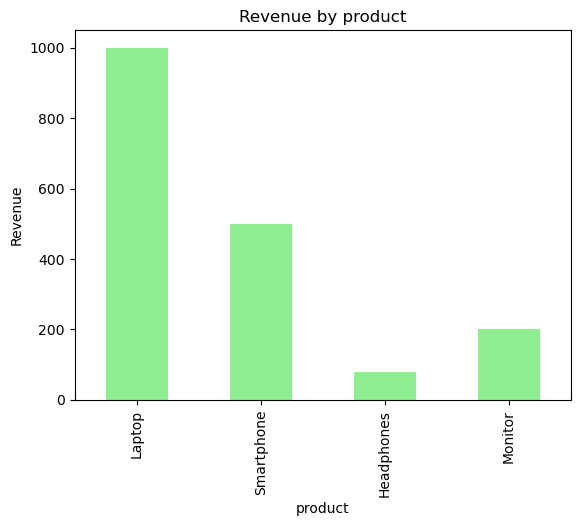

<Figure size 640x480 with 0 Axes>

In [63]:
#printing a bar chart 
df.plot(kind='bar', x='product', y='price',legend=False,color='lightgreen')
plt.ylabel('Revenue')
plt.title('Revenue by product')
plt.show()
plt.savefig("sales_chart.png")